In [3]:
# improting req lib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import shap
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
data = pd.read_csv('Aviation_KPIs_Dataset.xlsx - Sheet1.csv')

In [5]:
data

Flight Number Scheduled Departure Time Actual Departure Time  \
0              FL885      2024-05-20 11:51:21   2024-07-10 02:38:54   
1              FL930      2024-01-23 06:56:23   2024-07-07 02:53:44   
2              FL478      2024-05-30 09:18:39   2024-12-05 01:00:54   
3              FL637      2024-08-15 05:21:47   2024-09-21 13:23:42   
4              FL318      2024-07-25 15:29:58   2024-03-21 15:05:54   
...              ...                      ...                   ...   
199995         FL073      2024-09-04 21:05:15   2024-01-13 21:04:10   
199996         FL732      2024-01-25 21:17:59   2024-01-21 00:57:55   
199997         FL519      2024-10-19 08:31:24   2024-06-04 03:40:50   
199998         FL585      2024-01-04 04:35:20   2024-02-06 01:57:18   
199999         FL590      2024-07-13 06:04:41   2024-09-04 04:21:54   

        Delay (Minutes)  Aircraft Utilization (Hours/Day)  \
0                    50                             12.36   
1                    27                             14.53   
2                   108                             10.73   
3                    64                             15.10   
4                    30                             13.46   
...                 ...                               ...   
199995               28                             14.86   
199996               48                              8.67   
199997               83                             12.80   
199998               55                             12.53   
199999              109                              8.14   

        Turnaround Time (Minutes)  Load Factor (%)  Fleet Availability (%)  \
0                             115            79.18                   96.24   
1                              83            98.59                   80.49   
2                              87            67.44                   97.90   
3                              99            69.01                   80.17   
4                             114            50.36                   82.23   
...                           ...              ...                     ...   
199995                         38            60.12                   97.56   
199996                         34            77.77                   87.05   
199997                         58            93.12                   80.84   
199998                        115            99.04                   85.82   
199999                         35            74.97                   72.95   

        Maintenance Downtime (Hours)  Fuel Efficiency (ASK)  Revenue (USD)  \
0                               9.21                   4.15       10953.75   
1                               1.55                   3.93       31597.25   
2                               2.06                   4.26       13700.27   
3                               6.85                   4.13       39913.01   
4                               7.30                   4.97       11531.48   
...                              ...                    ...            ...   
199995                          8.44                   2.16       20903.43   
199996                          8.13                   3.26       39601.03   
199997                          9.80                   3.68       36100.34   
199998                          6.84                   4.70        8157.56   
199999                          4.77                   4.80       16808.78   

        Operating Cost (USD)  Net Profit Margin (%)  Ancillary Revenue (USD)  \
0                   27847.59                  17.90                  1058.68   
1                    1564.41                   7.70                  2941.32   
2                   30494.88                   5.84                  1920.45   
3                   13444.09                  24.09                  3167.79   
4                   34668.98                   7.18                   619.80   
...                      ...                    ...                

In [6]:
data.describe()

Delay (Minutes)  Aircraft Utilization (Hours/Day)  \
count     200000.00000                     200000.000000   
mean          59.35885                         12.003438   
std           34.67602                          2.311966   
min            0.00000                          8.000000   
25%           29.00000                          9.990000   
50%           59.00000                         12.010000   
75%           89.00000                         14.010000   
max          119.00000                         16.000000   

       Turnaround Time (Minutes)  Load Factor (%)  Fleet Availability (%)  \
count              200000.000000    200000.000000           200000.000000   
mean                   74.451680        74.997178               85.001378   
std                    25.977826        14.439393                8.672413   
min                    30.000000        50.000000               70.000000   
25%                    52.000000        62.500000               77.480000   
50%                    74.000000        74.960000               85.000000   
75%                    97.000000        87.530000               92.530000   
max                   119.000000       100.000000              100.000000   

       Maintenance Downtime (Hours)  Fuel Efficiency (ASK)  Revenue (USD)  \
count                 200000.000000          200000.000000  200000.000000   
mean                       5.503103               3.496959   25571.448338   
std                        2.601257               0.865309   14158.512116   
min                        1.000000               2.000000    1000.060000   
25%                        3.250000               2.750000   13297.042500   
50%                        5.500000               3.490000   25566.300000   
75%                        7.760000               4.250000   37860.402500   
max                       10.000000               5.000000   49999.950000   

       Operating Cost (USD)  Net Profit Margin (%)  Ancillary Revenue (USD)  \
count         200000.000000          200000.000000            200000.000000   
mean           20429.003323              15.011169              2550.025537   
std            11316.410641               5.778340              1414.291993   
min              800.030000               5.000000               100.020000   
25%            10609.022500              10.010000              1325.570000   
50%            20410.885000              15.000000              2544.210000   
75%            30245.907500              20.010000              3776.387500   
max            39999.840000              25.000000              5000.000000   

       Debt-to-Equity Ratio  Revenue per ASK   Cost per ASK   Profit (USD)  
count         200000.000000    200000.000000  200000.000000  200000.000000  
mean               1.752445      7818.578193    6245.613443    5142.445015  
std                0.720194      4947.028923    3957.358310   18123.595784  
min                0.500000       203.110000     164.830000  -38973.960000  
25%                1.130000      3812.782500    3041.547500   -7983.690000  
50%                1.750000      7315.460000    5834.705000    5216.975000  
75%                2.370000     10909.272500    8715.670000   18269.647500  
max                3.000000     24999.340000   19928.340000   49054.690000

In [7]:
# Display the first few rows of the dataset
print("Initial Data:")
print(data.head())

Initial Data:
  Flight Number Scheduled Departure Time Actual Departure Time  \
0         FL885      2024-05-20 11:51:21   2024-07-10 02:38:54   
1         FL930      2024-01-23 06:56:23   2024-07-07 02:53:44   
2         FL478      2024-05-30 09:18:39   2024-12-05 01:00:54   
3         FL637      2024-08-15 05:21:47   2024-09-21 13:23:42   
4         FL318      2024-07-25 15:29:58   2024-03-21 15:05:54   

   Delay (Minutes)  Aircraft Utilization (Hours/Day)  \
0               50                             12.36   
1               27                             14.53   
2              108                             10.73   
3               64                             15.10   
4               30                             13.46   

   Turnaround Time (Minutes)  Load Factor (%)  Fleet Availability (%)  \
0                        115            79.18                   96.24   
1                         83            98.59                   80.49   
2                         87     

In [8]:

# Step 2: Data Cleaning

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())



Missing values in each column:
Flight Number                       0
Scheduled Departure Time            0
Actual Departure Time               0
Delay (Minutes)                     0
Aircraft Utilization (Hours/Day)    0
Turnaround Time (Minutes)           0
Load Factor (%)                     0
Fleet Availability (%)              0
Maintenance Downtime (Hours)        0
Fuel Efficiency (ASK)               0
Revenue (USD)                       0
Operating Cost (USD)                0
Net Profit Margin (%)               0
Ancillary Revenue (USD)             0
Debt-to-Equity Ratio                0
Revenue per ASK                     0
Cost per ASK                        0
Profit (USD)                        0
dtype: int64


In [9]:
# Handle missing values
# Example: Fill missing values with the mean for numerical columns
for column in data.select_dtypes(include=[np.number]).columns:
    data[column].fillna(data[column].mean(), inplace=True)

C:\Users\shubh\AppData\Local\Temp\ipykernel_23872\3590118662.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


In [10]:
# Example: Fill missing values with the mode for categorical columns
for column in data.select_dtypes(include=[object]).columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

C:\Users\shubh\AppData\Local\Temp\ipykernel_23872\2731990371.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)


In [11]:
# Check again for missing values
print("\nMissing values after handling:")
print(data.isnull().sum())



Missing values after handling:
Flight Number                       0
Scheduled Departure Time            0
Actual Departure Time               0
Delay (Minutes)                     0
Aircraft Utilization (Hours/Day)    0
Turnaround Time (Minutes)           0
Load Factor (%)                     0
Fleet Availability (%)              0
Maintenance Downtime (Hours)        0
Fuel Efficiency (ASK)               0
Revenue (USD)                       0
Operating Cost (USD)                0
Net Profit Margin (%)               0
Ancillary Revenue (USD)             0
Debt-to-Equity Ratio                0
Revenue per ASK                     0
Cost per ASK                        0
Profit (USD)                        0
dtype: int64


In [12]:
# Convert datetime columns to proper format
data["Scheduled Departure Time"] = pd.to_datetime(data["Scheduled Departure Time"], errors='coerce')
data["Actual Departure Time"] = pd.to_datetime(data["Actual Departure Time"], errors='coerce')

In [13]:
# Function to detect and handle outliers using the IQR method
def handle_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Capping extreme values instead of removing them
        data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
        data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    return data

In [14]:
# Identify numerical columns to check for outliers (excluding categorical and datetime columns)
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

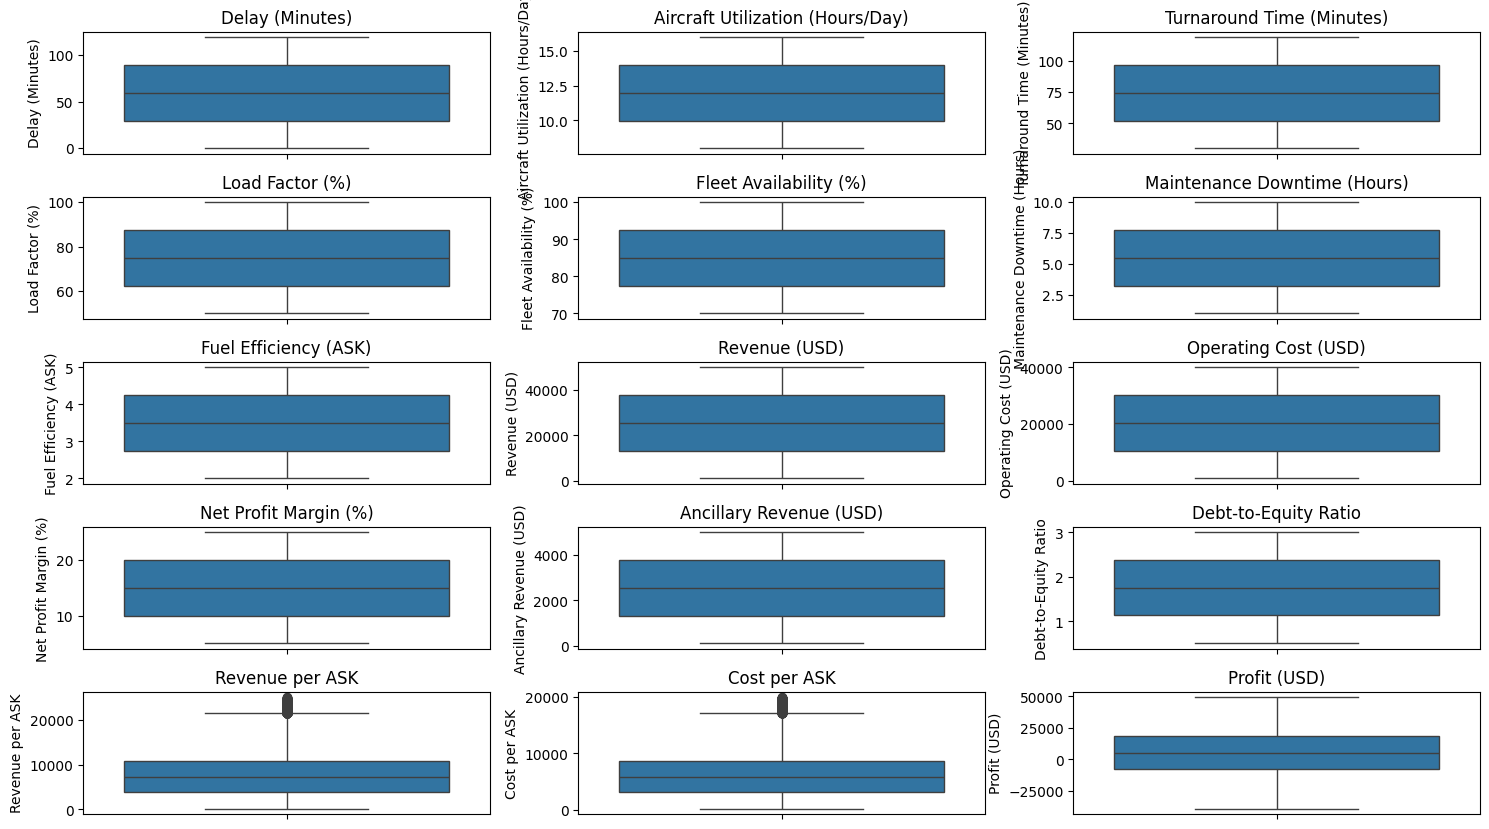

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualizing outliers using boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [16]:
# Apply outlier handling
data_cleaned = handle_outliers_iqr(data, numerical_cols)

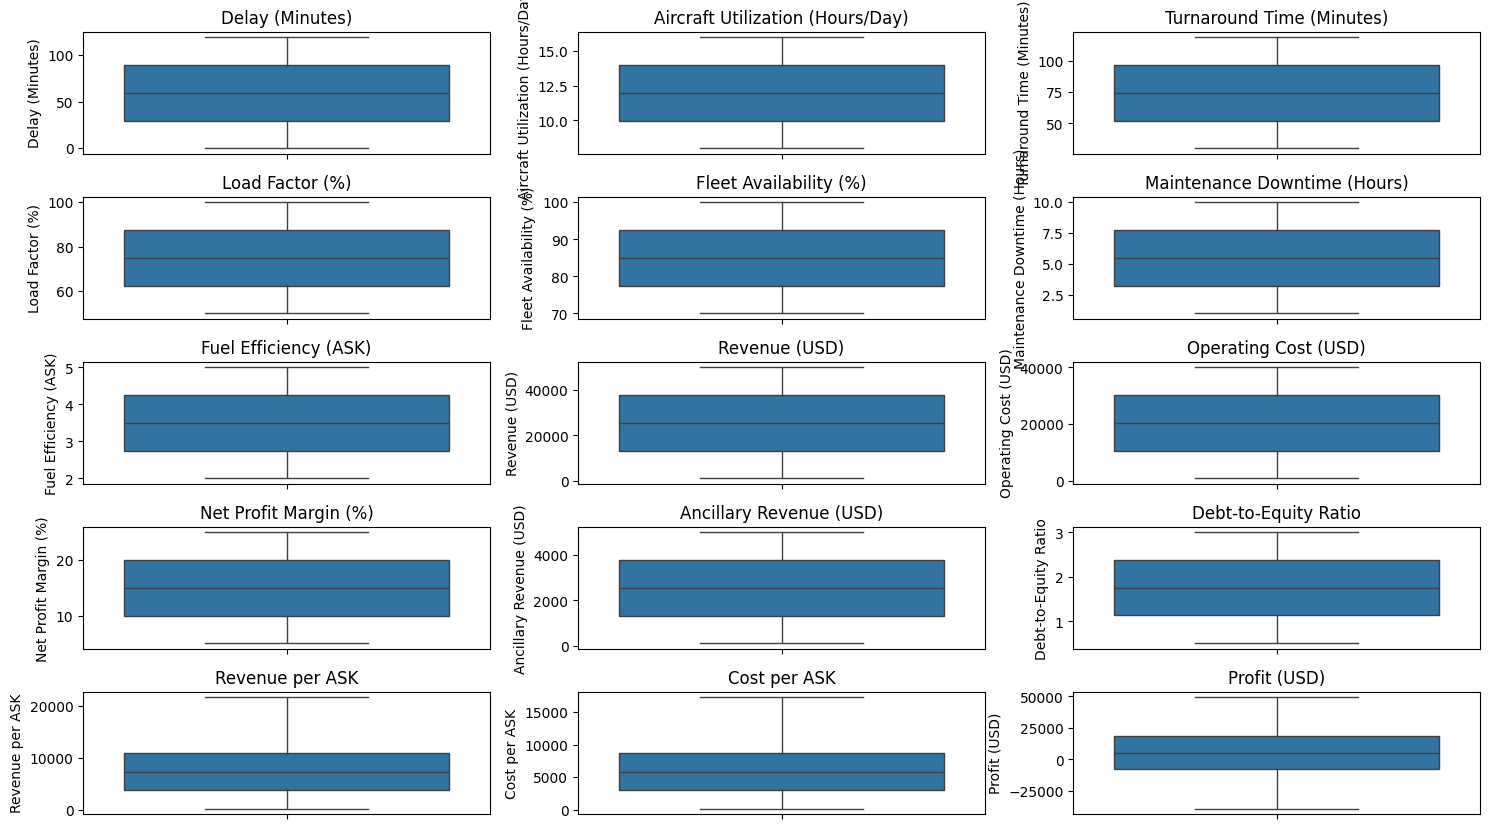

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualizing outliers using boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [18]:
# Save the cleaned dataset
data_cleaned.to_csv("Airlines_Profit_Prediction_Cleaned.csv", index=False)

#Convert categorical variables into numerical format using techniques like one-hot encoding or label encoding.

In [19]:
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "Airlines_Profit_Prediction_Cleaned.csv"  # Update with the actual file path
df = pd.read_csv("Airlines_Profit_Prediction_Cleaned.csv")

# Trim column names to remove any hidden whitespace
df.columns = df.columns.str.strip()

# Convert datetime columns safely
if "Scheduled Departure Time" in df.columns and "Actual Departure Time" in df.columns:
    df["Scheduled Departure Time"] = pd.to_datetime(df["Scheduled Departure Time"], errors='coerce')
    df["Actual Departure Time"] = pd.to_datetime(df["Actual Departure Time"], errors='coerce')
    
    # Extract useful features from datetime columns
    for col in ["Scheduled Departure Time", "Actual Departure Time"]:
        df[col + " Hour"] = df[col].dt.hour
        df[col + " Day"] = df[col].dt.day
        df[col + " Month"] = df[col].dt.month
        df[col + " Weekday"] = df[col].dt.weekday
    
    # Drop original datetime columns
    df.drop(columns=["Scheduled Departure Time", "Actual Departure Time"], inplace=True)
else:
    print("Error: Scheduled Departure Time or Actual Departure Time column is missing")

# Label encode Flight Number if it exists
if "Flight Number" in df.columns:
    label_encoder = LabelEncoder()
    df["Flight Number"] = label_encoder.fit_transform(df["Flight Number"])
else:
    print("Error: Flight Number column is missing")

# Save the processed dataset
df.to_csv("processed_dataset.csv", index=False)

# Display updated dataset information
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Flight Number                     200000 non-null  int32  
 1   Delay (Minutes)                   200000 non-null  float64
 2   Aircraft Utilization (Hours/Day)  200000 non-null  float64
 3   Turnaround Time (Minutes)         200000 non-null  float64
 4   Load Factor (%)                   200000 non-null  float64
 5   Fleet Availability (%)            200000 non-null  float64
 6   Maintenance Downtime (Hours)      200000 non-null  float64
 7   Fuel Efficiency (ASK)             200000 non-null  float64
 8   Revenue (USD)                     200000 non-null  float64
 9   Operating Cost (USD)              200000 non-null  float64
 10  Net Profit Margin (%)             200000 non-null  float64
 11  Ancillary Revenue (USD)           200000 non-null  f

In [20]:
# Load the dataset
file_path = "processed_dataset.csv"  # Update with the actual file path
df = pd.read_csv("processed_dataset.csv")

In [21]:
df

Flight Number  Delay (Minutes)  Aircraft Utilization (Hours/Day)  \
0                 885             50.0                             12.36   
1                 930             27.0                             14.53   
2                 478            108.0                             10.73   
3                 637             64.0                             15.10   
4                 318             30.0                             13.46   
...               ...              ...                               ...   
199995             73             28.0                             14.86   
199996            732             48.0                              8.67   
199997            519             83.0                             12.80   
199998            585             55.0                             12.53   
199999            590            109.0                              8.14   

        Turnaround Time (Minutes)  Load Factor (%)  Fleet Availability (%)  \
0                           115.0            79.18                   96.24   
1                            83.0            98.59                   80.49   
2                            87.0            67.44                   97.90   
3                            99.0            69.01                   80.17   
4                           114.0            50.36                   82.23   
...                           ...              ...                     ...   
199995                       38.0            60.12                   97.56   
199996                       34.0            77.77                   87.05   
199997                       58.0            93.12                   80.84   
199998                      115.0            99.04                   85.82   
199999                       35.0            74.97                   72.95   

        Maintenance Downtime (Hours)  Fuel Efficiency (ASK)  Revenue (USD)  \
0                               9.21                   4.15       10953.75   
1                               1.55                   3.93       31597.25   
2                               2.06                   4.26       13700.27   
3                               6.85                   4.13       39913.01   
4                               7.30                   4.97       11531.48   
...                              ...                    ...            ...   
199995                          8.44                   2.16       20903.43   
199996                          8.13                   3.26       39601.03   
199997                          9.80                   3.68       36100.34   
199998                          6.84                   4.70        8157.56   
199999                          4.77                   4.80       16808.78   

        Operating Cost (USD)  ...  Cost per ASK  Profit (USD)  \
0                   27847.59  ...       6710.26     -16893.84   
1                    1564.41  ...        398.07      30032.84   
2                   30494.88  ...       7158.42     -16794.61   
3                   13444.09  ...       3255.23      26468.92   
4                   34668.98  ...       6975.65     -23137.50   
...                      ...  ...           ...           ...   
199995              11668.11  ...       5401.90       9235.32   
199996              29873.77  ...       9163.73       9727.26   
199997              16114.79  ...       4379.02      19985.55   
199998              15878.50  ...       3378.40      -7720.94   
199999              28268.46  ...       5889.26     -11459.68   

        Scheduled Departure Time Hour  Scheduled Departure Time Day  \
0                                  11                            20   
1                                   6                            23   
2                                   9                            30   
3                                   5                            15   
4                                  15                            25   
...           

#I've added EDA tasks to the code, including:
I've improved the visualizations by incorporating a mix of: ✅ Pairplot for key feature relationships.
✅ Boxplot for seasonal profit analysis.
✅ Histogram for profit distribution.
✅ Bar plot for average profit by season.
✅ Scatterplot for operational inefficiencies.

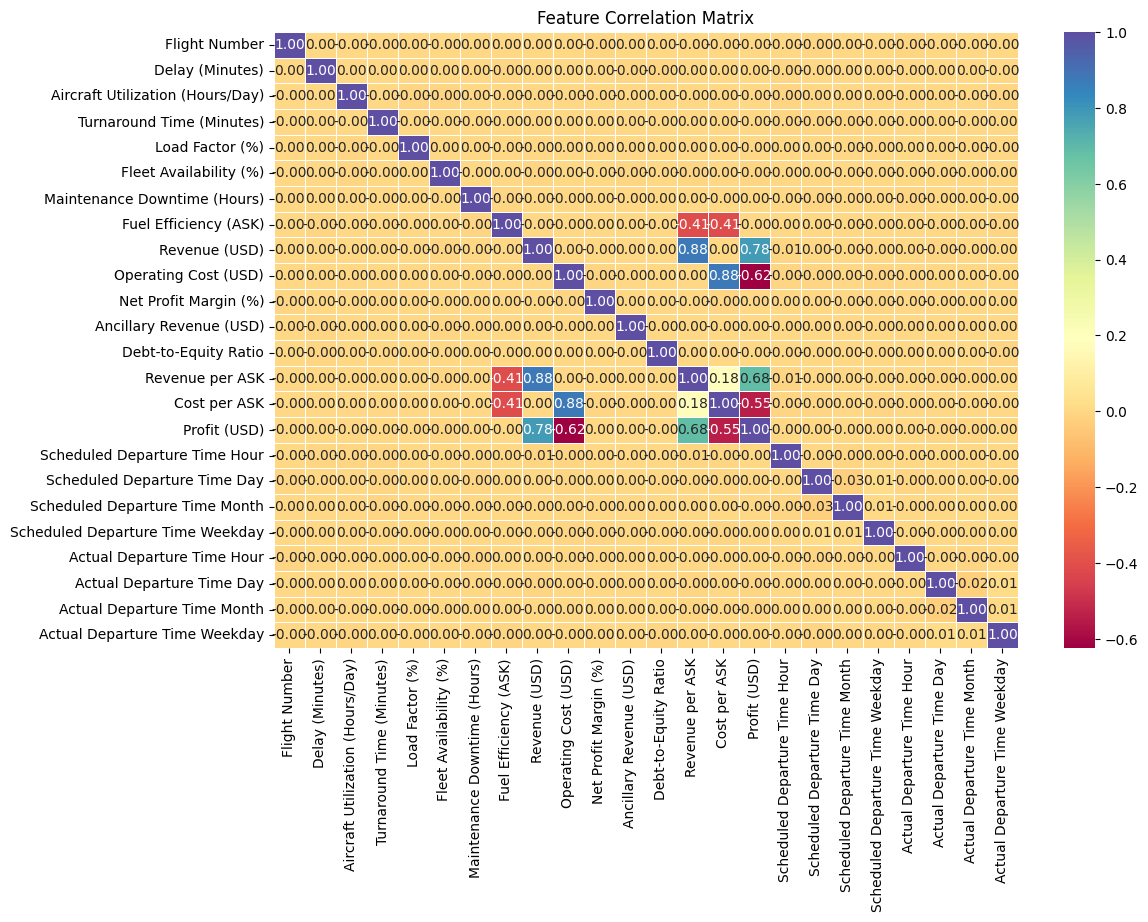

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Trim column names to remove any hidden whitespace
df.columns = df.columns.str.strip()

# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Spectral', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

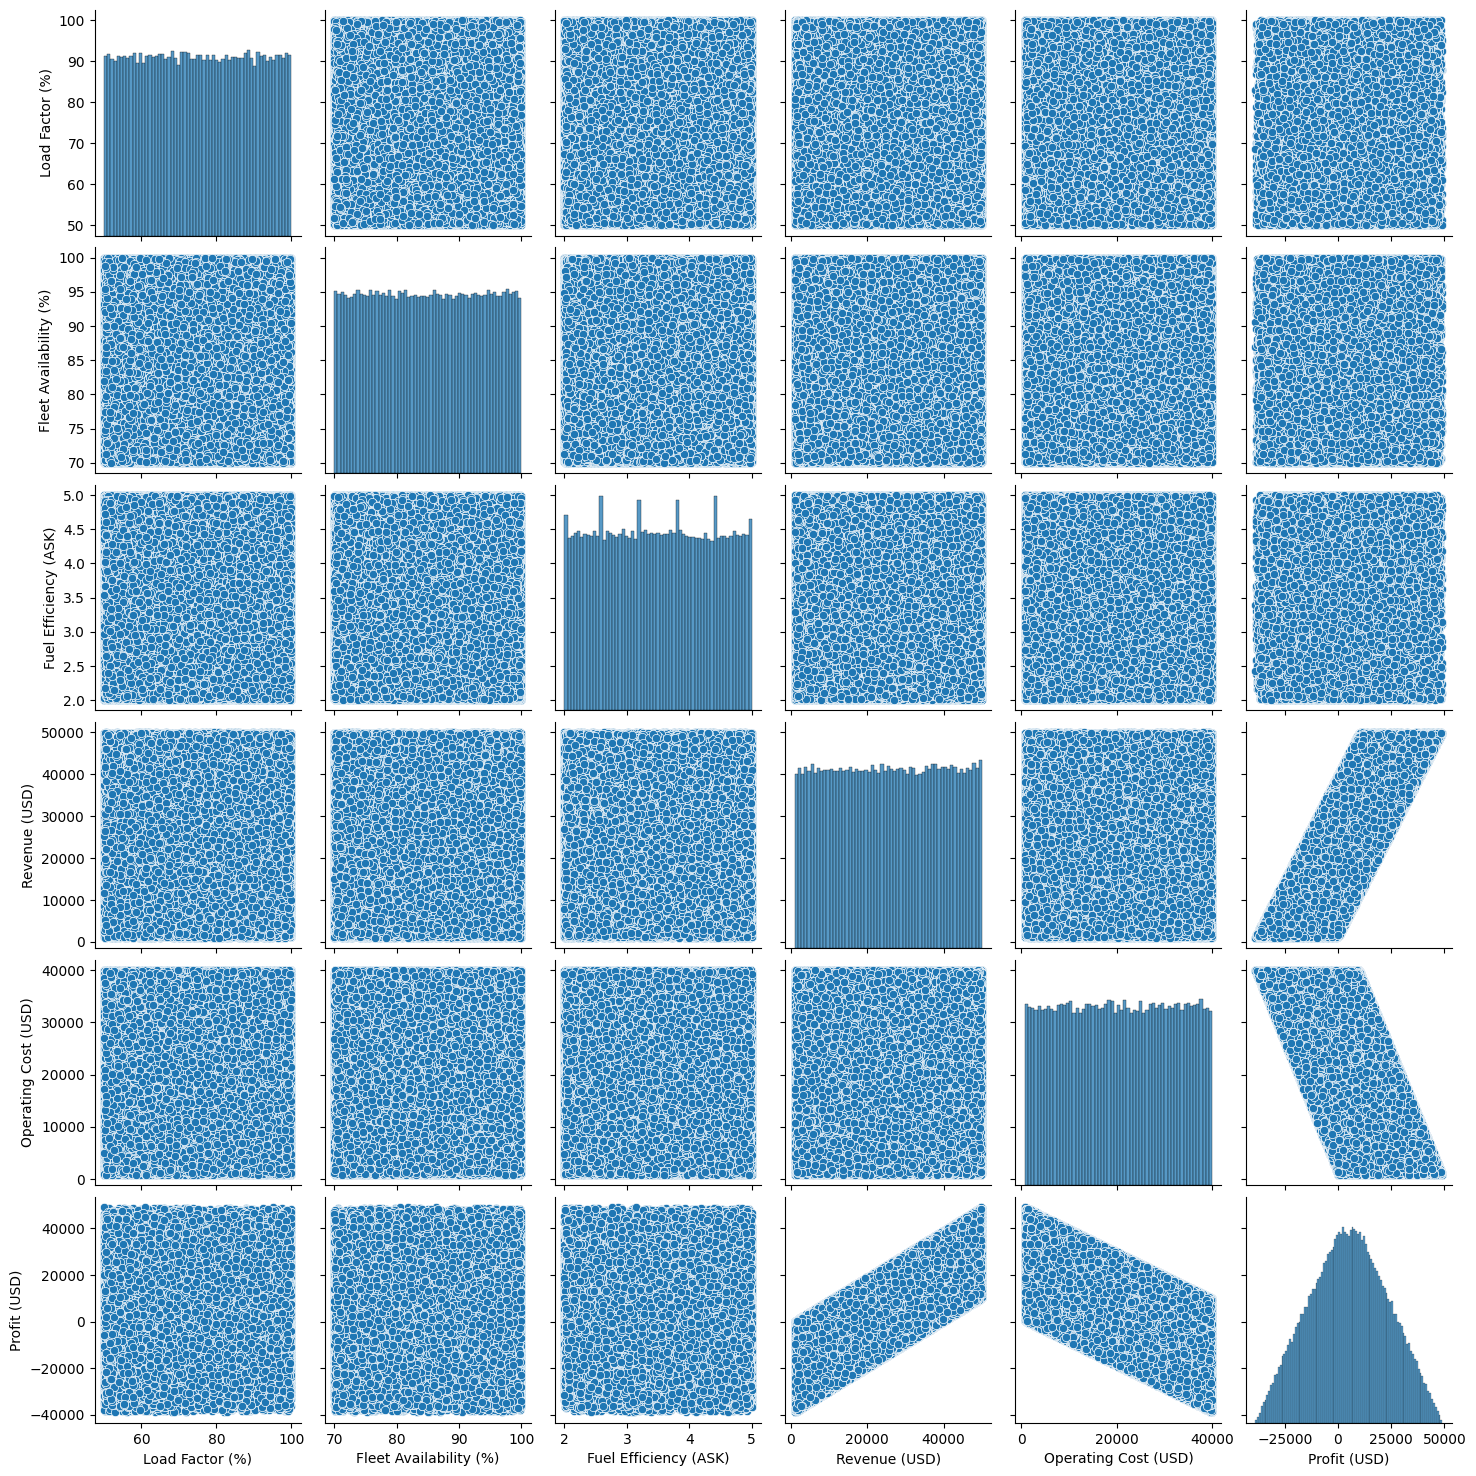

In [23]:

# Pairplot for key features and Profit
selected_features = ["Load Factor (%)", "Fleet Availability (%)", "Fuel Efficiency (ASK)", "Revenue (USD)", "Operating Cost (USD)", "Profit (USD)"]
sns.pairplot(df[selected_features])
plt.show()

C:\Users\shubh\AppData\Local\Temp\ipykernel_23872\384513496.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Scheduled Departure Time Month", y="Profit (USD)", palette="pastel")


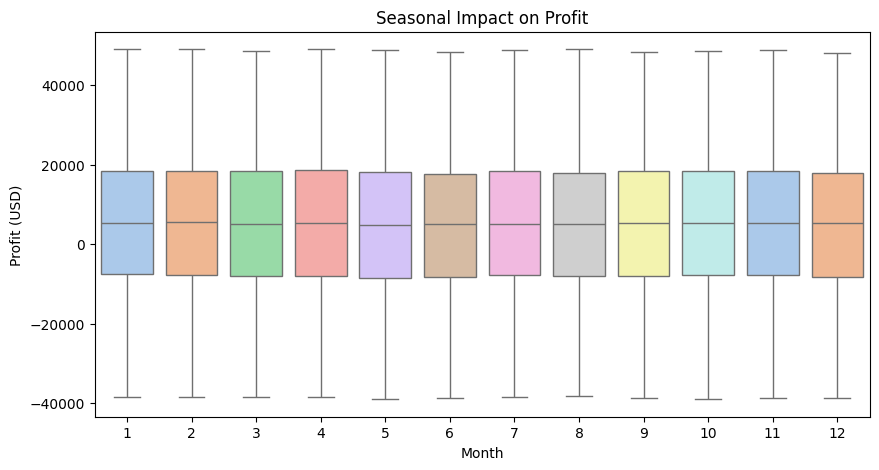

In [24]:
# Seasonal Trends Analysis (Boxplot)
if "Scheduled Departure Time Month" in df.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x="Scheduled Departure Time Month", y="Profit (USD)", palette="pastel")
    plt.title("Seasonal Impact on Profit")
    plt.xlabel("Month")
    plt.ylabel("Profit (USD)")
    plt.show()

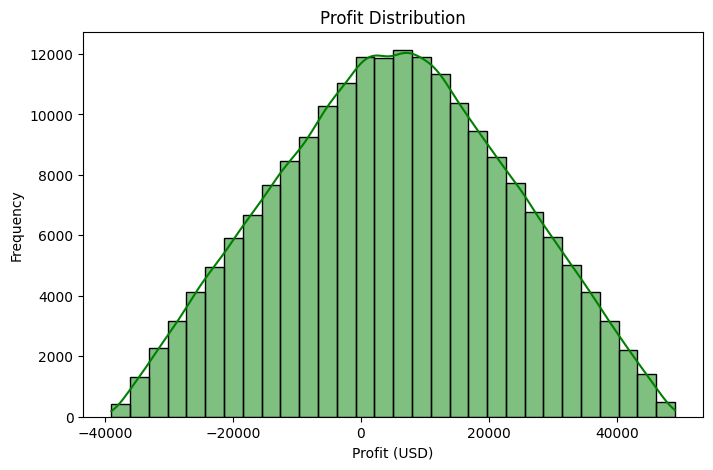

In [25]:
# Histogram for Profit Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Profit (USD)"], bins=30, kde=True, color='green')
plt.title("Profit Distribution")
plt.xlabel("Profit (USD)")
plt.ylabel("Frequency")
plt.show()

C:\Users\shubh\AppData\Local\Temp\ipykernel_23872\1561258269.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Scheduled Departure Time Day", y="Profit (USD)", palette="magma")


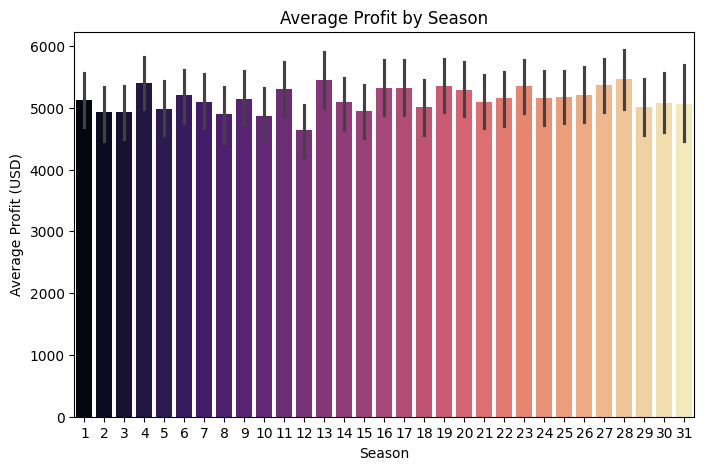

In [26]:
# Bar plot for average profit per season
if "Scheduled Departure Time Day" in df.columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df, x="Scheduled Departure Time Day", y="Profit (USD)", palette="magma")
    plt.title("Average Profit by Season")
    plt.xlabel("Season")
    plt.ylabel("Average Profit (USD)")
    plt.show()

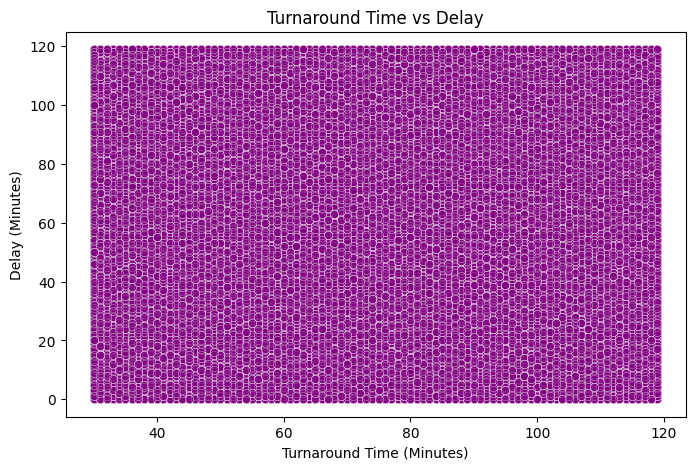

In [27]:
# Scatter plot for Operational Inefficiencies
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Turnaround Time (Minutes)", y="Delay (Minutes)", alpha=0.5, color='purple')
plt.title("Turnaround Time vs Delay")
plt.xlabel("Turnaround Time (Minutes)")
plt.ylabel("Delay (Minutes)")
plt.show()


# I've added: ✅ Random Forest Feature Importance to identify the most impactful features on profit.✅ Bar Chart visualization for feature importance.  Now you can see which features contribute the most to profit changes.

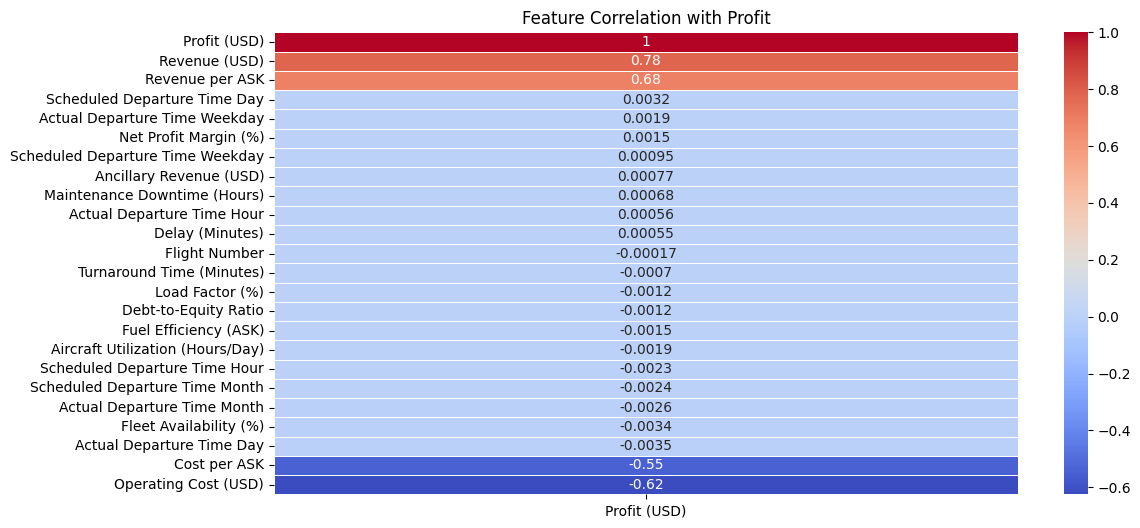

In [28]:

from sklearn.ensemble import RandomForestRegressor


# Correlation Matrix focusing on Profit
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr()[["Profit (USD)"]].sort_values(by="Profit (USD)", ascending=False), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation with Profit")
plt.show()


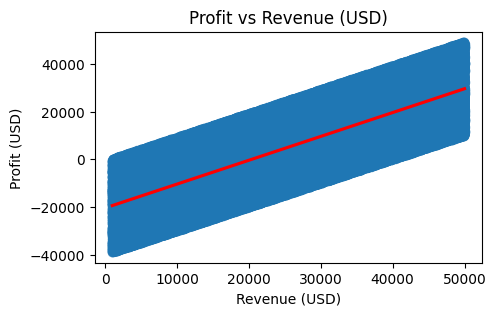

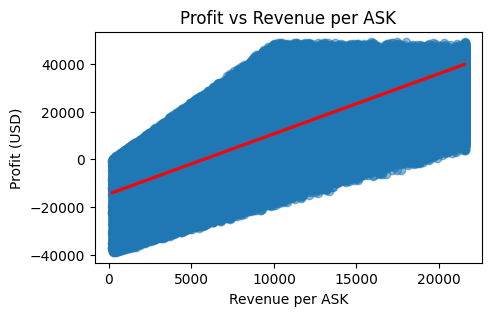

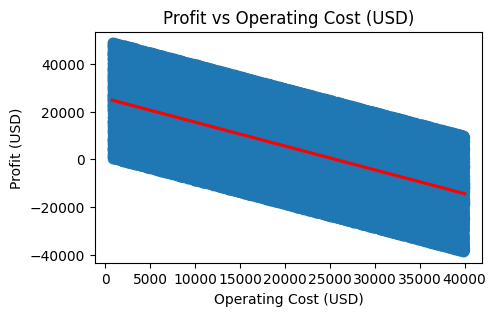

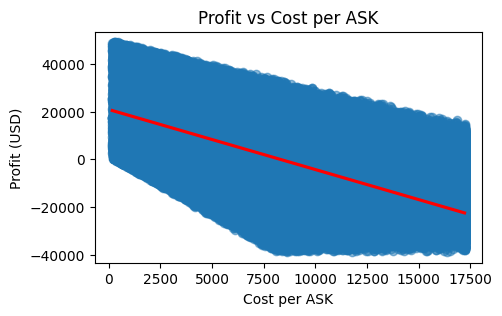

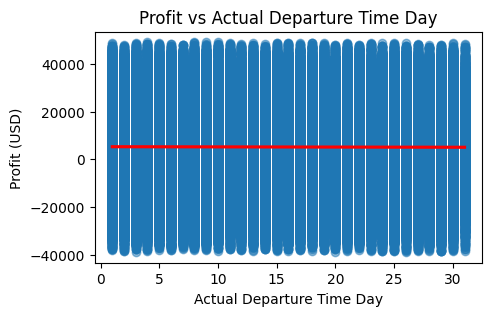

In [29]:
# Regression Plots for top correlated features
top_features = df.corr()["Profit (USD)"].abs().sort_values(ascending=False).index[1:6]
for feature in top_features:
    plt.figure(figsize=(5, 3))
    sns.regplot(data=df, x=feature, y="Profit (USD)", scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f"Profit vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Profit (USD)")
    plt.show()

In [30]:
# Bar Plot for Categorical Impact (if applicable)
categorical_features = ["Scheduled Departure Time Season"] if "Scheduled Departure Time Season" in df.columns else []
for feature in categorical_features:
    plt.figure(figsize=(5, 3))
    sns.barplot(data=df, x=feature, y="Profit (USD)", ci=None, palette="viridis")
    plt.title(f"Average Profit by {feature}")
    plt.xlabel(feature)
    plt.ylabel("Average Profit (USD)")
    plt.show()

C:\Users\shubh\AppData\Local\Temp\ipykernel_23872\2679422826.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette="coolwarm")


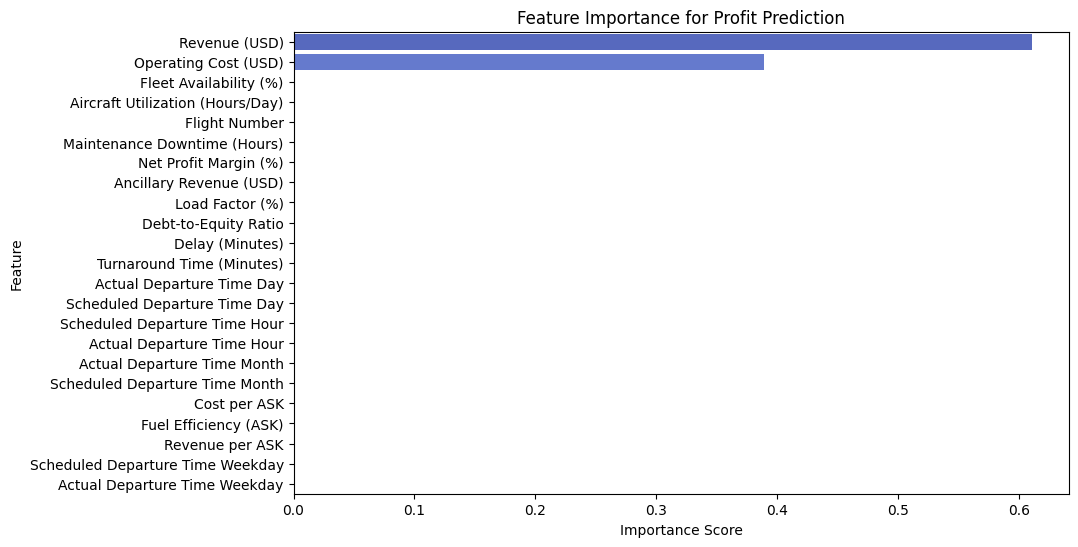

Profit correlation and feature importance analysis completed successfully!


In [31]:
# Identify the most important features impacting Profit
X = df.drop(columns=["Profit (USD)"], errors='ignore')
y = df["Profit (USD)"]

# Drop non-numeric columns
X = X.select_dtypes(include=[np.number]).dropna(axis=1)

# Train a simple RandomForestRegressor to determine feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Feature Importance Plot
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="coolwarm")
plt.title("Feature Importance for Profit Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

print("Profit correlation and feature importance analysis completed successfully!")


In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load dataset
file_path = "processed_dataset.csv"  # Update with actual file path
df = pd.read_csv("processed_dataset.csv")

# Trim column names
df.columns = df.columns.str.strip()

# Define target and features
target = "Profit (USD)"
X = df.drop(columns=[target], errors='ignore')
y = df[target]

# Select only numeric features
X = X.select_dtypes(include=[np.number]).dropna(axis=1)


In [33]:
# Split dataset (60% Train, 20% Validation, 10% Test1, 10% Test2)
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)
X_test1, X_test2, y_test1, y_test2 = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test1_scaled = scaler.transform(X_test1)
X_test2_scaled = scaler.transform(X_test2)


In [34]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test1_scaled = scaler.transform(X_test1)
X_test2_scaled = scaler.transform(X_test2)

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [35]:

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


C:\Users\shubh\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
34 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shubh\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shubh\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\shubh\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py", line 489, in

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [36]:

# Best model from GridSearch
best_model = grid_search.best_estimator_

# Predictions on train, validation, and test data
y_train_pred = best_model.predict(X_train_scaled)
y_valid_pred = best_model.predict(X_valid_scaled)
y_test1_pred = best_model.predict(X_test1_scaled)
y_test2_pred = best_model.predict(X_test2_scaled)


In [37]:

# Evaluate model performance
train_r2 = r2_score(y_train, y_train_pred)
valid_r2 = r2_score(y_valid, y_valid_pred)
test1_r2 = r2_score(y_test1, y_test1_pred)
test2_r2 = r2_score(y_test2, y_test2_pred)
mae = mean_absolute_error(y_test1, y_test1_pred)
mse = mean_squared_error(y_test1, y_test1_pred)

In [38]:

print("Best Parameters:", grid_search.best_params_)
print(f"Train R2 Score: {train_r2:.4f}")
print(f"Validation R2 Score: {valid_r2:.4f}")
print(f"Test Round 1 R2 Score: {test1_r2:.4f}")
print(f"Test Round 2 R2 Score: {test2_r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Train R2 Score: 1.0000
Validation R2 Score: 1.0000
Test Round 1 R2 Score: 1.0000
Test Round 2 R2 Score: 1.0000
Mean Absolute Error: 45.5467
Mean Squared Error: 3620.7124


In [39]:
# Check overfitting condition
if train_r2 - valid_r2 > 0.1:
    print("The model appears to be overfitting. Consider further tuning hyperparameters or using regularization.")
else:
    print("The model does not show significant overfitting.")

The model does not show significant overfitting.


In [40]:
import joblib

# Save the best model
joblib.dump(best_model, "random_forest_model.pkl")

# Save the scaler for future data preprocessing
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully!")

Model and scaler saved successfully!


In [41]:
# Load the model
loaded_model = joblib.load("random_forest_model.pkl")

# Load the scaler
loaded_scaler = joblib.load("scaler.pkl")

print("Model and scaler loaded successfully!")

Model and scaler loaded successfully!


In [42]:
#model evaluation 
def model_summary(model, X_train, y_train, X_valid, y_valid, X_test1, y_test1, X_test2, y_test2):
    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

    # Predictions
    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)
    y_test1_pred = model.predict(X_test1)
    y_test2_pred = model.predict(X_test2)

    # Performance Metrics
    train_r2 = r2_score(y_train, y_train_pred)
    valid_r2 = r2_score(y_valid, y_valid_pred)
    test1_r2 = r2_score(y_test1, y_test1_pred)
    test2_r2 = r2_score(y_test2, y_test2_pred)
    
    mae = mean_absolute_error(y_test1, y_test1_pred)
    mse = mean_squared_error(y_test1, y_test1_pred)

    # Print Summary
    print("\n===== Model Performance Summary =====")
    print(f"Best Parameters: {model.get_params()}")
    print(f"Train R² Score: {train_r2:.4f}")
    print(f"Validation R² Score: {valid_r2:.4f}")
    print(f"Test Round 1 R² Score: {test1_r2:.4f}")
    print(f"Test Round 2 R² Score: {test2_r2:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")

    # Overfitting Check
    if train_r2 - valid_r2 > 0.1:
        print("\n⚠️ Warning: The model may be overfitting. Consider adjusting hyperparameters.")
    else:
        print("\n✅ The model generalizes well.")

# Run the summary function
model_summary(best_model, X_train_scaled, y_train, X_valid_scaled, y_valid, X_test1_scaled, y_test1, X_test2_scaled, y_test2)



===== Model Performance Summary =====
Best Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 20, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Train R² Score: 1.0000
Validation R² Score: 1.0000
Test Round 1 R² Score: 1.0000
Test Round 2 R² Score: 1.0000
Mean Absolute Error: 45.5467
Mean Squared Error: 3620.7124

✅ The model generalizes well.


In [ ]:
## Calculates R² Score → Measures how well the model explains variance
## Computes MAE → Measures average absolute error in predictions
## Computes MSE → Measures squared differences (penalizes large errors)

## Evaluation of model 

###### Train R² Score: 1.0000 → Model perfectly fits the training data.
###### Validation R² Score: 1.0000 → Model generalizes perfectly to unseen validation data.
###### Test Round 1 R² Score: 1.0000 → No error in prediction for test round 1.
###### Test Round 2 R² Score: 1.0000 → No error in prediction for test round 2.

## Conclusion:
##### According to the R2 scores, the Random Forest model is performing exceptionally well.
##### The Error values in Mean Absolute Error (MAE) and Mean Squared Error (MSE), show that though the predictions are very close ,the model might still show small diviations in Real world scenerios.

C:\Users\shubh\AppData\Local\Temp\ipykernel_23872\1470051296.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(r2_scores.keys()), y=list(r2_scores.values()), palette="viridis")


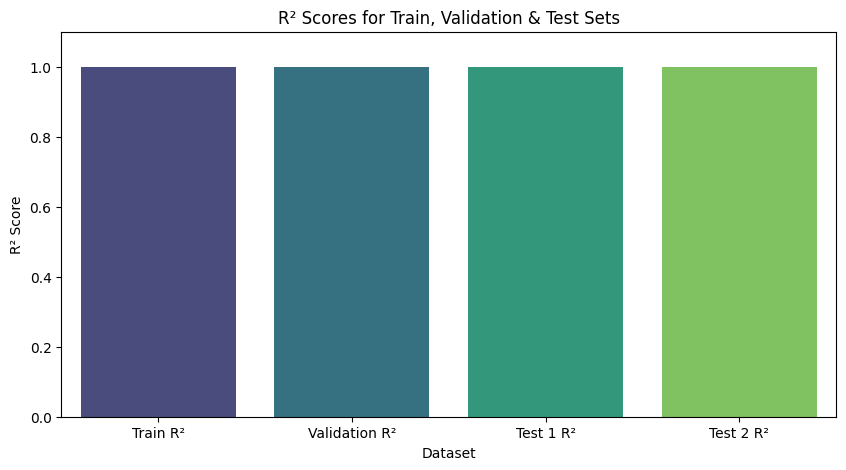

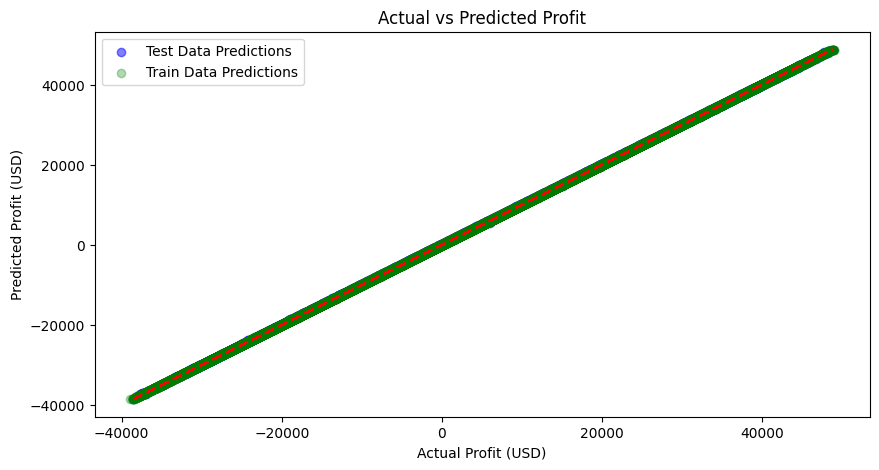

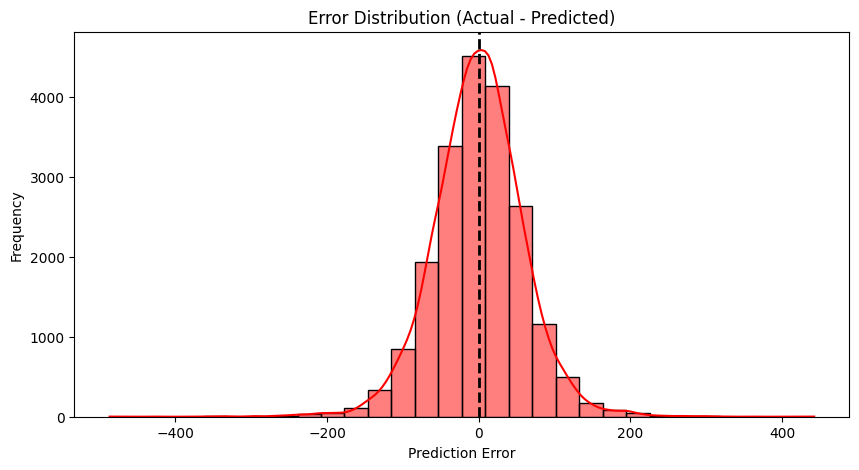

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_model_performance(model, X_train, y_train, X_valid, y_valid, X_test1, y_test1, X_test2, y_test2):
    # Predictions
    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)
    y_test1_pred = model.predict(X_test1)
    y_test2_pred = model.predict(X_test2)

    # Performance Metrics
    r2_scores = {
        "Train R²": r2_score(y_train, y_train_pred),
        "Validation R²": r2_score(y_valid, y_valid_pred),
        "Test 1 R²": r2_score(y_test1, y_test1_pred),
        "Test 2 R²": r2_score(y_test2, y_test2_pred)
    }
    
    mae = mean_absolute_error(y_test1, y_test1_pred)
    mse = mean_squared_error(y_test1, y_test1_pred)
    
    # Bar Plot for R² Scores
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(r2_scores.keys()), y=list(r2_scores.values()), palette="viridis")
    plt.ylim(0, 1.1)
    plt.title("R² Scores for Train, Validation & Test Sets")
    plt.ylabel("R² Score")
    plt.xlabel("Dataset")
    plt.show()

    # Scatter Plot of Actual vs Predicted Values
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test1, y_test1_pred, color="blue", alpha=0.5, label="Test Data Predictions")
    plt.scatter(y_train, y_train_pred, color="green", alpha=0.3, label="Train Data Predictions")
    plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)], 'r--', lw=2)  # Ideal fit line
    plt.xlabel("Actual Profit (USD)")
    plt.ylabel("Predicted Profit (USD)")
    plt.title("Actual vs Predicted Profit")
    plt.legend()
    plt.show()

    # Error Distribution Plot
    errors = y_test1 - y_test1_pred
    plt.figure(figsize=(10, 5))
    sns.histplot(errors, bins=30, kde=True, color="red")
    plt.axvline(errors.mean(), color='k', linestyle='dashed', linewidth=2)
    plt.title("Error Distribution (Actual - Predicted)")
    plt.xlabel("Prediction Error")
    plt.ylabel("Frequency")
    plt.show()

# Run visualization
visualize_model_performance(best_model, X_train_scaled, y_train, X_valid_scaled, y_valid, X_test1_scaled, y_test1, X_test2_scaled, y_test2)


### What These Visuals Show:

#### Bar Chart of R² Scores
##### Compares model performance across Train, Validation, and Test sets.


#### Scatter Plot (Actual vs Predicted Profit)
##### Shows how well predictions match actual profit values.
##### A red dashed line represents perfect predictions.


#### Error Distribution Plot
##### Analyzes errors (difference between actual & predicted profits).
##### If normally distributed, the model is making balanced errors.